# Personal Information
Name: **Mees Apeldoorn**

StudentID: **13224069**

Email: [**Mees.Apeldoorn@student.uva.nl**](youremail@student.uva.nl)

Submitted on: **21.03.2024**

# Data

### The Next Generation: a 5G Dataset with Channel and Context Metrics

 This dataset is generated from two mobility patterns (static and car), and across two application patterns(video streaming and file download). The dataset is composed of client-side cellular key performance indicators (KPIs) comprised of channel-related metrics, context-related metrics, cell-related metrics and throughput information. These metrics are generated from a well-known non-rooted Android network monitoring application, G-NetTrack Pro. To the best of our knowledge, this is the first publicly available dataset that contains throughput, channel and context information for 5G networks.

dataset:
 https://github.com/uccmisl/5Gdataset

paper:
https://cora.ucc.ie/items/4574b0c6-f441-4323-a0dd-5deda43453ec

### A 4G LTE dataset with channel and context metrics

A 4G trace dataset composed of client-side cellular key performance indicators (KPIs) collected from two major Irish mobile operators, across different mobility patterns (static, pedestrian, car, bus and train). The 4G trace dataset contains 135 traces, with an average duration of fifteen minutes per trace, with viewable throughput ranging from 0 to 173 Mbit/s at a granularity of one sample per second. Our traces are generated from a well-known non-rooted Android network monitoring application, GNetTrack Pro. This tool enables capturing various channel related KPIs, context-related metrics, downlink and uplink throughput, and also cell-related information.

dataset:
https://www.kaggle.com/datasets/aeryss/lte-dataset

paper:
https://cora.ucc.ie/items/b86aca50-bc76-4c68-8626-f50a43df944e

# Data Description


In [150]:
# Imports
import datetime
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy
from directory_tree import display_tree
%matplotlib inline
plt.style.use('bmh')

### Data Loading

In [151]:
relative_path_to_data = '../Data'

display_tree(relative_path_to_data, max_depth=3)
# The 4G dataset does not provide a type of data being used, so i assume it to be just Download of any type.

Data/
├── 4G-LTE-dataset/
│   └── Download/
│       ├── bus/
│       ├── car/
│       ├── pedestrian/
│       ├── static/
│       └── train/
└── 5G-production-dataset/
    ├── Amazon_Prime/
    │   ├── Driving/
    │   └── Static/
    ├── Download/
    │   ├── Driving/
    │   └── Static/
    └── Netflix/
        ├── Driving/
        └── Static/


We can combine all seperate files in this 'Data' directory into one big CSV, since ther share a lot of columns

In [152]:
import os
import pandas as pd

def read_csv_with_encodings(file_path):
    encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']
    for encoding in encodings:
        try:
            return pd.read_csv(file_path, encoding=encoding)
        except UnicodeDecodeError:
            continue
    raise UnicodeDecodeError(f"Failed to read the file {file_path} with the given encodings")

def combine_files_in_directory(directory):
    dfs = []
    current_file = 0
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        current_file +=1
        if os.path.isfile(file_path):
            df = read_csv_with_encodings(file_path)
            # Add a column to identify the type of data (based on the directory name)
            path_components = directory.split('\\')
            if len(path_components) > 3:
                df['download_type'] = path_components[2]
                df['trace_mobility'] = path_components[3]
            df['TraceID'] = os.path.splitext(filename)[0]
            dfs.append(df)
            
        # Check if the item is a directory
        elif os.path.isdir(file_path):
            dfs.extend(combine_files_in_directory(file_path))

    return dfs

base_dir = '../Data'
# Combine files from all subdirectories in the base directory
combined_dfs = combine_files_in_directory(base_dir)

# Concatenate all DataFrames into one
combined_df = pd.concat(combined_dfs, ignore_index=True)
combined_df


,Timestamp,Longitude,Latitude,Speed,Operatorname,CellID,NetworkMode,RSRP,RSRQ,SNR,...,Unnamed: 0,PINGAVG,PINGMIN,PINGMAX,PINGSTDEV,PINGLOSS,CELLHEX,NODEHEX,LACHEX,RAWCELLID
0,2017.11.30_16.48.26,-8.501373,51.893359,0.0,A,2.0,LTE,-102.0,-12,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017.11.30_16.48.26,-8.501291,51.893462,1.0,A,2.0,LTE,-102.0,-12,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017.11.30_16.48.27,-8.501291,51.893462,1.0,A,2.0,LTE,-102.0,-12,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017.11.30_16.48.28,-8.501291,51.893462,1.0,A,2.0,LTE,-102.0,-12,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017.11.30_16.48.29,-8.501291,51.893462,1.0,A,2.0,LTE,-102.0,-13,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363229,2019.12.16_13.36.25,-8.394601,51.886139,0.0,B,11.0,5G,-101.0,-13,-7.0,...,NaN,-,-,-,-,-,B,A4DF,9CBA,10805003.0
363230,2019.12.16_13.36.27,-8.394601,51.886139,0.0,B,11.0,5G,-101.0,-13,-7.0,...,NaN,-,-,-,-,-,B,A4DF,9CBA,10805003.0
363231,2019.12.16_13.36.28,-8.394601,51.886139,0.0,B,11.0,5G,-103.0,-12,5.0,...,NaN,-,-,-,-,-,B,A4DF,9CBA,10805003.0
363232,2019.12.16_13.36.29,-8.394601,51.886139,0.0,B,11.0,5G,-103.0,-12,5.0,...,NaN,-,-,-,-,-,B,A4DF,9CBA,10805003.0


In [153]:
#get 5g only
df_5g = combined_df[combined_df['NetworkMode']=="5G"]

#Select only relavent columns
#RSRP, RSRQ, SNR, CQI, RSSI are all key performance metrics (KPI)
df_5g = combined_df[['Timestamp', 'DL_bitrate', 'PINGAVG', 'PINGLOSS', 'State', 'download_type', 'trace_mobility', 'TraceID', 'NetworkMode']]

# # force null values for empty entries
df_5g = df_5g.applymap(lambda x: x if x != "-" else np.NaN) 


#Convert types for all collumns
df_5g = df_5g.convert_dtypes()
df_5g['NetworkMode'] = df_5g['NetworkMode'].astype("string")
df_5g[[ 'PINGAVG', 'PINGLOSS', 'DL_bitrate']] =\
    df_5g[['PINGAVG', 'PINGLOSS', 'DL_bitrate']].apply(pd.to_numeric)

# combine dataset naming for driving
df_5g.loc[df_5g['trace_mobility'] == 'driving', 'trace_mobility'] = 'car' 


#turn netflix and amazon_prime into a single streaming category
df_5g.loc[df_5g['download_type'].isin(['netflix', 'amazon_prime']), 'download_type'] = 'streaming'

#keep only download data
df_5g = df_5g[df_5g['download_type'] == 'Download']
df_5g

C:\Users\meesa\AppData\Local\Temp\ipykernel_24140\2066416271.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_5g = df_5g.applymap(lambda x: x if x != "-" else np.NaN)


,Timestamp,DL_bitrate,PINGAVG,PINGLOSS,State,download_type,trace_mobility,TraceID,NetworkMode
0,2017.11.30_16.48.26,3,<NA>,<NA>,D,Download,bus,A_2017.11.30_16.48.26,LTE
1,2017.11.30_16.48.26,3,<NA>,<NA>,D,Download,bus,A_2017.11.30_16.48.26,LTE
2,2017.11.30_16.48.27,310,<NA>,<NA>,D,Download,bus,A_2017.11.30_16.48.26,LTE
3,2017.11.30_16.48.28,0,<NA>,<NA>,I,Download,bus,A_2017.11.30_16.48.26,LTE
4,2017.11.30_16.48.29,0,<NA>,<NA>,I,Download,bus,A_2017.11.30_16.48.26,LTE
...,...,...,...,...,...,...,...,...,...
290397,2020.02.27_20.30.16,0,70.0,0.0,D,Download,Static,B_2020.02.27_18.39.27,5G
290398,2020.02.27_20.30.17,84590,<NA>,<NA>,D,Download,Static,B_2020.02.27_18.39.27,5G
290399,2020.02.27_20.30.18,276708,<NA>,<NA>,D,Download,Static,B_2020.02.27_18.39.27,5G
290400,2020.02.27_20.30.19,276724,<NA>,<NA>,D,Download,Static,B_2020.02.27_18.39.27,5G


In [154]:
#interpolate values with a limit of 5 consecutive missing values
df_5g.loc[:,['PINGAVG', 'PINGLOSS']] = df_5g[['PINGAVG', 'PINGLOSS']].interpolate('nearest', limit=50, limit_direction="forward")
#integer values have to use exiting values instead of estimating
df_5g[['DL_bitrate']] = df_5g[['DL_bitrate']].interpolate('pad', limit=10, limit_direction="forward")

df_5g

C:\Users\meesa\AppData\Local\Temp\ipykernel_24140\3322000902.py:4: FutureWarning: DataFrame.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_5g[['DL_bitrate']] = df_5g[['DL_bitrate']].interpolate('pad', limit=10, limit_direction="forward")


,Timestamp,DL_bitrate,PINGAVG,PINGLOSS,State,download_type,trace_mobility,TraceID,NetworkMode
0,2017.11.30_16.48.26,3,<NA>,<NA>,D,Download,bus,A_2017.11.30_16.48.26,LTE
1,2017.11.30_16.48.26,3,<NA>,<NA>,D,Download,bus,A_2017.11.30_16.48.26,LTE
2,2017.11.30_16.48.27,310,<NA>,<NA>,D,Download,bus,A_2017.11.30_16.48.26,LTE
3,2017.11.30_16.48.28,0,<NA>,<NA>,I,Download,bus,A_2017.11.30_16.48.26,LTE
4,2017.11.30_16.48.29,0,<NA>,<NA>,I,Download,bus,A_2017.11.30_16.48.26,LTE
...,...,...,...,...,...,...,...,...,...
290397,2020.02.27_20.30.16,0,70.0,0.0,D,Download,Static,B_2020.02.27_18.39.27,5G
290398,2020.02.27_20.30.17,84590,NaN,NaN,D,Download,Static,B_2020.02.27_18.39.27,5G
290399,2020.02.27_20.30.18,276708,NaN,NaN,D,Download,Static,B_2020.02.27_18.39.27,5G
290400,2020.02.27_20.30.19,276724,NaN,NaN,D,Download,Static,B_2020.02.27_18.39.27,5G


In [155]:
# Remove na values (most of them are the start or end of traces in ping)
df_5g = df_5g.dropna()

# Use .loc to avoid SettingWithCopyWarning
df_5g.loc[:, 'PINGAVG_SMOOTH'] = df_5g.groupby('TraceID')['PINGAVG'].transform(lambda x: x.rolling(window=15, center=True).mean())
df_5g.loc[:, 'PINGLOSS_SMOOTH'] = df_5g.groupby('TraceID')['PINGLOSS'].transform(lambda x: x.rolling(window=15, center=True).mean())
df_5g.loc[:, 'DL_bitrate_SMOOTH'] = df_5g.groupby('TraceID')['DL_bitrate'].transform(lambda x: x.rolling(window=5, center=True).mean())

# Remove na values again if necessary
df_5g = df_5g.dropna()


C:\Users\meesa\AppData\Local\Temp\ipykernel_24140\3549412411.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5g.loc[:, 'PINGAVG_SMOOTH'] = df_5g.groupby('TraceID')['PINGAVG'].transform(lambda x: x.rolling(window=15, center=True).mean())
C:\Users\meesa\AppData\Local\Temp\ipykernel_24140\3549412411.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5g.loc[:, 'PINGLOSS_SMOOTH'] = df_5g.groupby('TraceID')['PINGLOSS'].transform(lambda x: x.rolling(window=15, center=True).mean())
C:\Users\meesa\AppData

In [159]:
df_5g

,Timestamp,DL_bitrate,PINGAVG,PINGLOSS,State,download_type,trace_mobility,TraceID,NetworkMode,PINGAVG_SMOOTH,PINGLOSS_SMOOTH,DL_bitrate_SMOOTH
247210,2019.12.14_10.16.46,7399,82.0,0.0,D,Download,Driving,B_2019.12.14_10.16.30,5G,82.466667,0.0,11262.4
247211,2019.12.14_10.16.47,10045,83.0,0.0,D,Download,Driving,B_2019.12.14_10.16.30,5G,82.533333,0.0,10056.2
247212,2019.12.14_10.16.48,12042,83.0,0.0,D,Download,Driving,B_2019.12.14_10.16.30,5G,82.600000,0.0,11665.0
247213,2019.12.14_10.16.49,12772,83.0,0.0,D,Download,Driving,B_2019.12.14_10.16.30,5G,82.666667,0.0,11357.6
247214,2019.12.14_10.16.50,16067,83.0,0.0,D,Download,Driving,B_2019.12.14_10.16.30,5G,82.733333,0.0,9349.0
...,...,...,...,...,...,...,...,...,...,...,...,...
290386,2020.02.27_20.30.06,197961,68.0,0.0,D,Download,Static,B_2020.02.27_18.39.27,5G,68.400000,0.0,178248.0
290387,2020.02.27_20.30.07,199365,68.0,0.0,D,Download,Static,B_2020.02.27_18.39.27,5G,68.533333,0.0,204219.4
290388,2020.02.27_20.30.08,200280,68.0,0.0,D,Download,Static,B_2020.02.27_18.39.27,5G,68.666667,0.0,191586.4
290389,2020.02.27_20.30.09,180803,68.0,0.0,D,Download,Static,B_2020.02.27_18.39.27,5G,68.800000,0.0,188669.0


<Axes: >

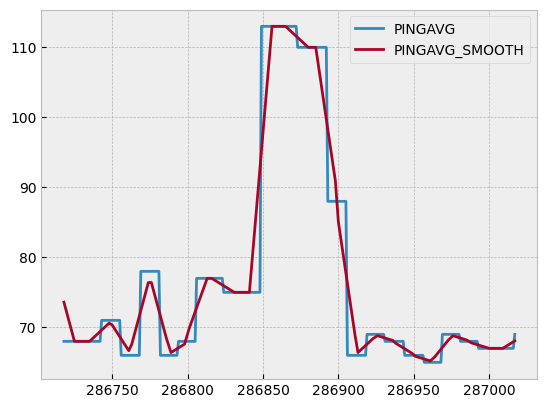

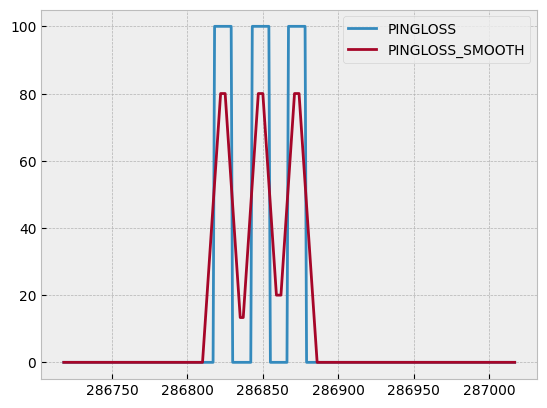

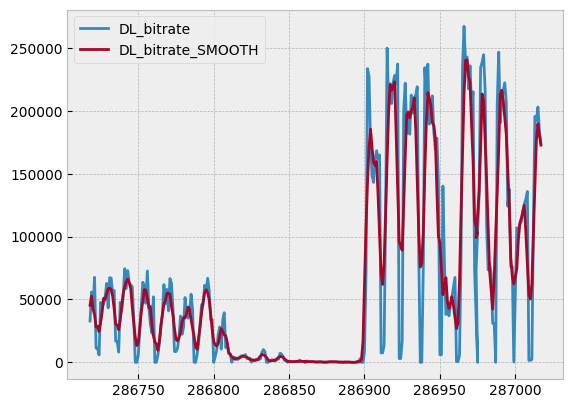

In [161]:
#example of how rolling average affects the values
df_trace_182 = df_5g[df_5g['TraceID']=='B_2020.02.27_18.39.27']
df_trace_182=df_trace_182.iloc[2300:2600]
df_trace_182=df_trace_182.sort_values(by='Timestamp', ascending = False)
df_trace_182[['PINGAVG', 'PINGAVG_SMOOTH']].plot(label='PINGAVG_SMOOTH vs PINGAVG')
df_trace_182[['PINGLOSS', 'PINGLOSS_SMOOTH']].plot(label='PINGLOSS_SMOOTH vs PINGLOSS')
df_trace_182[['DL_bitrate', 'DL_bitrate_SMOOTH']].plot(label='DL_bitrate_SMOOTH vs DL_bitrate_SMOOTH')

In [162]:
#if any timestamp of a trace is duplicated (ussually ping info), drop it
print(len(df_5g))
df_5g = df_5g.drop_duplicates(subset=['Timestamp'])
print(len(df_5g))

#leave only rows when downloading
df_5g = df_5g[df_5g['State']=='D']

#ensure download speed is atleast 50kb
#df_5g['DL_bitrate'] = df_5g['DL_bitrate'].clip(lower=50)
df_5g['DL_bitrate_SMOOTH'] = df_5g['DL_bitrate_SMOOTH'].clip(lower=50)

#keep only 1 decimal place
pd.options.display.float_format = '{:,.1f}'.format
#PING to int
df_5g['PINGAVG_SMOOTH'] = df_5g['PINGAVG_SMOOTH'].astype(int)

42897
38678


In [170]:
#sort traces by timestamp
df_5g=df_5g.sort_values(by='Timestamp', ascending = True)


#df_5g_final = df_5g[['DL_bitrate', 'PINGAVG_SMOOTH', 'PINGLOSS_SMOOTH']]

#save traces to separate files
grouped = df_5g.groupby(by=['TraceID', 'trace_mobility'])
for name, group in grouped:
    print(name, group)
    trace, mobil = name
    if len(group) < 800: continue
    #keep only important columns
    # group.to_csv(f"processed/{mobil}_{trace}.csv", index=False,
                #  columns=['DL_bitrate_SMOOTH', 'PINGAVG_SMOOTH', 'PINGLOSS_SMOOTH'], float_format='%.1f')

('B_2019.12.14_10.16.30', 'Driving')                   Timestamp  DL_bitrate  PINGAVG  PINGLOSS State  \
247210  2019.12.14_10.16.46        7399     82.0       0.0     D   
247211  2019.12.14_10.16.47       10045     83.0       0.0     D   
247212  2019.12.14_10.16.48       12042     83.0       0.0     D   
247213  2019.12.14_10.16.49       12772     83.0       0.0     D   
247214  2019.12.14_10.16.50       16067     83.0       0.0     D   
...                     ...         ...      ...       ...   ...   
248336  2019.12.14_10.35.40          22    278.0      20.0     D   
248337  2019.12.14_10.35.41          11    278.0      20.0     D   
248338  2019.12.14_10.35.42          22    278.0      20.0     D   
248339  2019.12.14_10.35.43          22    278.0      20.0     D   
248341  2019.12.14_10.35.44          11    278.0      20.0     D   

       download_type trace_mobility                TraceID NetworkMode  \
247210      Download        Driving  B_2019.12.14_10.16.30          5G  

### Cleaning data

In [157]:
print(combined_df['data_type'].unique())
print(combined_df['transportation_type'].unique())
# Driving and car should be the same, so does Static and static.

KeyError: 'data_type'

In [ ]:
def preprocess_transportation_type(value):
    if value.lower() == 'driving':
        return 'car'
    else:
        return value.lower()

In [ ]:
#Select only relevant columns
#RSRP, RSRQ, SNR, CQI, RSSI are all key performance metrics (KPI)
combined_df = combined_df[['Timestamp', 'Speed', 'CellID', 'NetworkMode', 'RSRP', 'RSRQ',  'PINGAVG', 'PINGLOSS', 'State',
               'SNR', 'CQI', 'RSSI', 'DL_bitrate', 'State', 'data_type', 'transportation_type', 'trace_id']]

# force NaN values for empty entries
combined_df = combined_df.applymap(lambda x: x if x != "-" else np.NaN) 
combined_df['transportation_type'] = combined_df['transportation_type'].apply(preprocess_transportation_type)
combined_df['data_type'] = combined_df['data_type'].apply(preprocess_transportation_type)

#Convert types for all collumns
combined_df = combined_df.convert_dtypes()
combined_df['NetworkMode'] = combined_df['NetworkMode'].astype("string")
combined_df[['RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI', 'DL_bitrate']] = combined_df[['RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI', 'DL_bitrate']].apply(pd.to_numeric)


combined_df

C:\Users\meesa\AppData\Local\Temp\ipykernel_24140\3052025444.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  combined_df = combined_df.applymap(lambda x: x if x != "-" else np.NaN)


,Timestamp,Speed,CellID,NetworkMode,RSRP,RSRQ,PINGAVG,PINGLOSS,State,SNR,CQI,RSSI,DL_bitrate,State,data_type,transportation_type,trace_id
0,2017.11.30_16.48.26,0,2,LTE,-102,-12.0,<NA>,<NA>,D,10.0,7.0,-85.0,3,D,download,bus,A_2017.11.30_16.48.26
1,2017.11.30_16.48.26,1,2,LTE,-102,-12.0,<NA>,<NA>,D,10.0,7.0,-85.0,3,D,download,bus,A_2017.11.30_16.48.26
2,2017.11.30_16.48.27,1,2,LTE,-102,-12.0,<NA>,<NA>,D,7.0,10.0,-87.0,310,D,download,bus,A_2017.11.30_16.48.26
3,2017.11.30_16.48.28,1,2,LTE,-102,-12.0,<NA>,<NA>,I,7.0,7.0,-85.0,0,I,download,bus,A_2017.11.30_16.48.26
4,2017.11.30_16.48.29,1,2,LTE,-102,-13.0,<NA>,<NA>,I,8.0,7.0,-85.0,0,I,download,bus,A_2017.11.30_16.48.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363229,2019.12.16_13.36.25,0,11,5G,-101,-13.0,<NA>,<NA>,D,-7.0,10.0,-85.0,1,D,netflix,static,B_2019.12.16_13.03.47
363230,2019.12.16_13.36.27,0,11,5G,-101,-13.0,<NA>,<NA>,D,-7.0,11.0,-88.0,0,D,netflix,static,B_2019.12.16_13.03.47
363231,2019.12.16_13.36.28,0,11,5G,-103,-12.0,<NA>,<NA>,D,5.0,11.0,-88.0,15,D,netflix,static,B_2019.12.16_13.03.47
363232,2019.12.16_13.36.29,0,11,5G,-103,-12.0,<NA>,<NA>,D,5.0,11.0,-88.0,4,D,netflix,static,B_2019.12.16_13.03.47


In [ ]:
combined_df.loc[:,['PINGAVG', 'PINGLOSS']] = combined_df[['PINGAVG', 'PINGLOSS']].interpolate('nearest', limit=50, limit_direction="forward")
#integer values have to use exiting values instead of estimating
combined_df[['DL_bitrate']] = combined_df[['DL_bitrate']].interpolate('pad', limit=10, limit_direction="forward")

combined_df

AxisError: axis 1 is out of bounds for array of dimension 1

lets see how many values are nan per trace, together with the total length of the traces

In [ ]:
grouped = combined_df.groupby('trace_id')

nan_count_per_trace = grouped.apply(lambda x: x.isna().sum())
total_length_per_trace = grouped.size().rename('total_length')

result = pd.concat([nan_count_per_trace, total_length_per_trace], axis=1)
result

C:\Users\meesa\AppData\Local\Temp\ipykernel_24140\896823190.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nan_count_per_trace = grouped.apply(lambda x: x.isna().sum())


,Timestamp,Speed,CellID,NetworkMode,RSRP,RSRQ,PINGAVG,PINGLOSS,State,SNR,CQI,RSSI,DL_bitrate,State,data_type,transportation_type,trace_id,total_length
trace_id,,,,,,,,,,,,,,,,,,
A_2017.11.21_15.03.50,0,0,0,0,0,0,1571,1571,0,0,0,124,0,0,0,0,0,1571
A_2017.11.21_15.35.33,0,0,0,0,0,0,1509,1509,0,0,0,112,0,0,0,0,0,1509
A_2017.11.21_17.35.54,0,0,0,0,0,0,956,956,0,0,0,54,0,0,0,0,0,956
A_2017.11.22_07.57.13,0,0,0,0,0,0,709,709,0,0,0,40,0,0,0,0,0,709
A_2017.11.22_10.06.58,0,0,0,0,0,0,2623,2623,0,0,0,3,0,0,0,0,0,2623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_2020.02.14_12.58.17,0,0,0,0,0,672,898,890,0,672,672,672,0,0,0,0,0,960
B_2020.02.14_13.21.26,0,0,0,0,0,0,933,933,0,0,0,0,0,0,0,0,0,1013
B_2020.02.27_17.30.15,0,0,0,0,0,632,806,803,0,632,632,632,0,0,0,0,0,866


Some traces contain a very large number of NaN values, for all of RSRQ, SNR, CQI, RSSI. It might be smart to remove these traces, which have above 50% NaN values.

In [ ]:
nan_percentage = combined_df.groupby('trace_id')[['RSRQ', 'SNR', 'CQI', 'RSSI']].apply(lambda x: x.isna().mean())
trace_ids_to_remove = nan_percentage[nan_percentage.mean(axis=1) > 0.5].index
cleaned_df = combined_df[~combined_df['trace_id'].isin(trace_ids_to_remove)]
cleaned_df

,Timestamp,Speed,CellID,NetworkMode,RSRP,RSRQ,PINGAVG,PINGLOSS,State,SNR,CQI,RSSI,DL_bitrate,State,data_type,transportation_type,trace_id
0,2017.11.30_16.48.26,0,2,LTE,-102,-12.0,<NA>,<NA>,D,10.0,7.0,-85.0,3,D,download,bus,A_2017.11.30_16.48.26
1,2017.11.30_16.48.26,1,2,LTE,-102,-12.0,<NA>,<NA>,D,10.0,7.0,-85.0,3,D,download,bus,A_2017.11.30_16.48.26
2,2017.11.30_16.48.27,1,2,LTE,-102,-12.0,<NA>,<NA>,D,7.0,10.0,-87.0,310,D,download,bus,A_2017.11.30_16.48.26
3,2017.11.30_16.48.28,1,2,LTE,-102,-12.0,<NA>,<NA>,I,7.0,7.0,-85.0,0,I,download,bus,A_2017.11.30_16.48.26
4,2017.11.30_16.48.29,1,2,LTE,-102,-13.0,<NA>,<NA>,I,8.0,7.0,-85.0,0,I,download,bus,A_2017.11.30_16.48.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363229,2019.12.16_13.36.25,0,11,5G,-101,-13.0,<NA>,<NA>,D,-7.0,10.0,-85.0,1,D,netflix,static,B_2019.12.16_13.03.47
363230,2019.12.16_13.36.27,0,11,5G,-101,-13.0,<NA>,<NA>,D,-7.0,11.0,-88.0,0,D,netflix,static,B_2019.12.16_13.03.47
363231,2019.12.16_13.36.28,0,11,5G,-103,-12.0,<NA>,<NA>,D,5.0,11.0,-88.0,15,D,netflix,static,B_2019.12.16_13.03.47
363232,2019.12.16_13.36.29,0,11,5G,-103,-12.0,<NA>,<NA>,D,5.0,11.0,-88.0,4,D,netflix,static,B_2019.12.16_13.03.47


In [ ]:
static_df = cleaned_df[cleaned_df['transportation_type']=='static']



In [ ]:
grouped = static_df.groupby('trace_id')

nan_count_per_trace = grouped.apply(lambda x: x.isna().sum())
total_length_per_trace = grouped.size().rename('total_length')

result = pd.concat([nan_count_per_trace, total_length_per_trace], axis=1)
result


C:\Users\meesa\AppData\Local\Temp\ipykernel_24140\1620549412.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nan_count_per_trace = grouped.apply(lambda x: x.isna().sum())


,Timestamp,Speed,CellID,NetworkMode,RSRP,RSRQ,PINGAVG,PINGLOSS,State,SNR,CQI,RSSI,DL_bitrate,State,data_type,transportation_type,trace_id,total_length
trace_id,,,,,,,,,,,,,,,,,,
A_2017.11.22_10.06.58,0,0,0,0,0,0,2623,2623,0,0,0,3,0,0,0,0,0,2623
A_2017.11.23_10.08.29,0,0,0,0,0,0,1001,1001,0,0,0,289,0,0,0,0,0,1001
A_2017.11.23_13.14.40,0,0,0,0,0,0,2194,2194,0,0,0,21,0,0,0,0,0,2194
A_2017.11.28_11.55.31,0,0,0,0,0,0,1048,1048,0,0,0,0,0,0,0,0,0,1048
A_2017.11.30_16.15.00,0,0,0,0,0,0,538,538,0,0,0,6,0,0,0,0,0,538
A_2017.11.30_16.15.04,0,0,0,0,0,0,591,591,0,0,0,35,0,0,0,0,0,591
A_2017.12.03_10.09.56,0,0,0,0,0,0,1002,1002,0,0,0,0,0,0,0,0,0,1002
A_2017.12.03_10.35.01,0,0,0,0,0,0,1094,1094,0,0,0,41,0,0,0,0,0,1094
A_2017.12.15_11.05.30,0,0,0,0,0,0,599,599,0,0,0,8,0,0,0,0,0,599


In [ ]:
# static_df[static_df['trace_id']=="A_2017.11.22_10.06.58"]
result[result['RSSI']<10]

,Timestamp,Speed,CellID,NetworkMode,RSRP,RSRQ,PINGAVG,PINGLOSS,State,SNR,CQI,RSSI,DL_bitrate,State,data_type,transportation_type,trace_id,total_length
trace_id,,,,,,,,,,,,,,,,,,
A_2017.11.22_10.06.58,0,0,0,0,0,0,2623,2623,0,0,0,3,0,0,0,0,0,2623
A_2017.11.28_11.55.31,0,0,0,0,0,0,1048,1048,0,0,0,0,0,0,0,0,0,1048
A_2017.11.30_16.15.00,0,0,0,0,0,0,538,538,0,0,0,6,0,0,0,0,0,538
A_2017.12.03_10.09.56,0,0,0,0,0,0,1002,1002,0,0,0,0,0,0,0,0,0,1002
A_2017.12.15_11.05.30,0,0,0,0,0,0,599,599,0,0,0,8,0,0,0,0,0,599
B_2017.12.17_14.16.19,0,0,0,0,0,0,623,623,0,0,0,0,0,0,0,0,0,623
B_2018.01.27_13.58.28,0,0,0,0,0,0,868,868,0,0,0,0,0,0,0,0,0,868
B_2019.12.16_13.40.04,0,0,0,0,0,0,1985,1981,0,0,0,2,0,0,0,0,0,2143
B_2020.01.16_10.43.34,0,0,0,0,0,10,3062,3057,0,0,0,0,0,0,0,0,0,3322


### Data distribution

now that we have cleaned up a big part of the data, lets have a look at the distribution of some of these values and create some plots

In [ ]:
cleaned_df.describe()

,Speed,CellID,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate
count,303650.0,303650.0,303650.0,301726.000000,279267.000000,279268.000000,233168.000000,303650.0
mean,17.107285,2974.144324,-92.354589,-11.704149,3.997544,9.941379,-79.064301,11926.963896
std,21.444427,11302.059796,13.343542,3.848328,7.529942,3.204256,13.033747,30426.668319
min,0.0,0.0,-200.0,-26.000000,-30.000000,0.000000,-113.000000,0.0
25%,0.0,2.0,-101.0,-14.000000,-1.000000,7.000000,-88.000000,0.0
50%,3.0,11.0,-95.0,-12.000000,3.000000,10.000000,-80.000000,1848.0
75%,34.0,11.0,-84.0,-10.000000,8.000000,12.000000,-70.000000,11125.0
max,115.0,64262.0,-27.0,4.000000,35.000000,15.000000,-31.000000,532905.0


In [ ]:
print(cleaned_df['trace_id'].value_counts())
print(cleaned_df['NetworkMode'].value_counts())
print(cleaned_df['transportation_type'].value_counts())
print(cleaned_df['data_type'].value_counts())
print(cleaned_df['Speed'].value_counts())


trace_id
B_2019.12.03_08.02.05    7190
B_2019.12.23_10.30.35    6992
B_2020.01.06_11.40.29    6581
B_2020.01.03_08.59.40    6143
B_2019.12.06_09.55.13    6020
                         ... 
A_2018.01.25_18.02.07     414
A_2017.12.09_14.04.02     397
B_2020.01.16_12.10.03     384
A_2018.01.25_19.50.40     348
B_2019.11.21_10.20.17     268
Name: count, Length: 184, dtype: Int64
NetworkMode
LTE      143477
5G       135794
HSPA+     20320
UMTS       1933
HSUPA      1871
EDGE        132
HSDPA       122
GPRS          1
Name: count, dtype: Int64
transportation_type
car           154623
static        100427
pedestrian     32749
bus             8713
train           7138
Name: count, dtype: Int64
data_type
download        159166
netflix          72832
amazon_prime     71652
Name: count, dtype: Int64
Speed
0      109968
3       18305
1       17954
2        7514
4        6665
        ...  
104        33
99         32
101        10
105         9
102         8
Name: count, Length: 109, dtype: Int64


C:\Users\meesa\AppData\Local\Temp\ipykernel_24140\1883836587.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = cleaned_df['Speed'].groupby(pd.cut(cleaned_df['Speed'], bins=bins)).count()


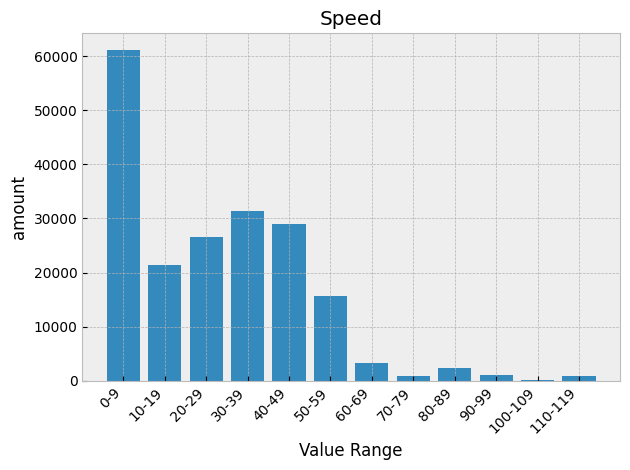

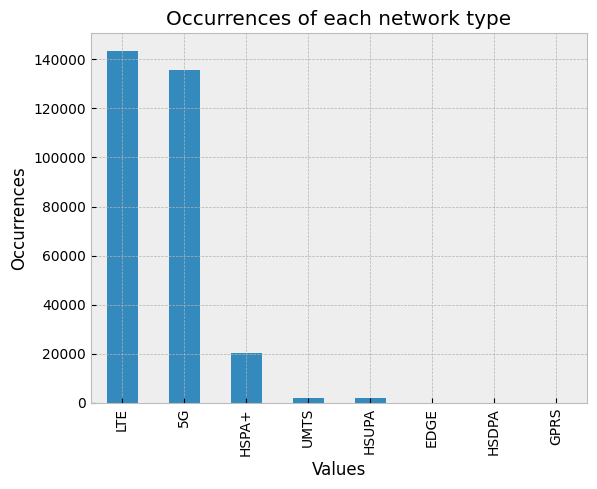

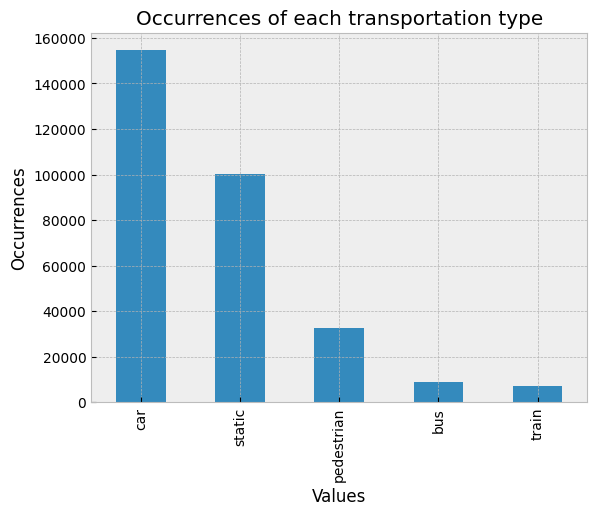

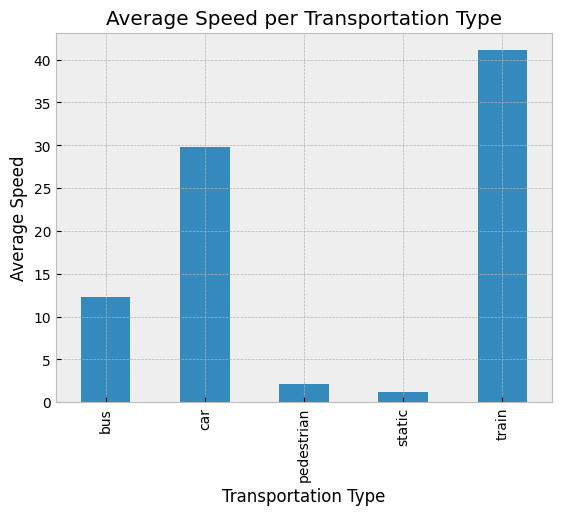

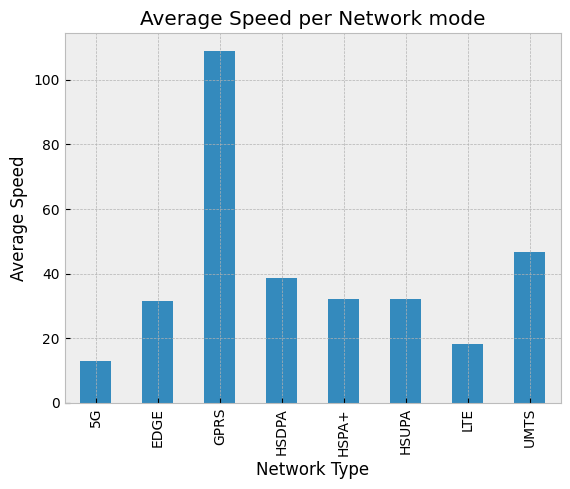

In [ ]:
# Create bins for grouping values
bins = range(0, max(cleaned_df['Speed'])+10, 10)

# Group values into bins
groups = cleaned_df['Speed'].groupby(pd.cut(cleaned_df['Speed'], bins=bins)).count()

# Plot the barplot
plt.bar(range(len(groups)), groups.values, tick_label=[f'{int(b.left)}-{int(b.right-1)}' for b in groups.index])
plt.xlabel('Value Range')
plt.ylabel('amount')
plt.title('Speed')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label overlapping
plt.show()

cleaned_df['NetworkMode'].value_counts().plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Occurrences')
plt.title('Occurrences of each network type')
plt.show()

cleaned_df['transportation_type'].value_counts().plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Occurrences')
plt.title('Occurrences of each transportation type')
plt.show()

cleaned_df.groupby("transportation_type")["Speed"].mean().plot(kind="bar")
plt.xlabel("Transportation Type")
plt.ylabel("Average Speed")
plt.title("Average Speed per Transportation Type")
plt.show()

cleaned_df.groupby("NetworkMode")["Speed"].mean().plot(kind="bar")
plt.xlabel("Network Type")
plt.ylabel("Average Speed")
plt.title("Average Speed per Network mode")
plt.show()


The data is seperated relatively evenly. There are a few older network types represented in small numbers, which could probably be removed. such as HSUPA, EDGE, HSDPA, GPRS. These are 3G or even 2G technologies that are only used when 4G (LTE) or 5G is not available. HSPA+ is a intermediate between 4G and 3G, and can possibly also be discarded. 

In [ ]:
analysis_df = cleaned_df[cleaned_df['State']=='D']
cov_matrix = analysis_df[analysis_df['NetworkMode'] == 'LTE'][['Speed', 'SNR', 'DL_bitrate']].corr()
sns.heatmap(cov_matrix, annot=True, fmt='g')
plt.title("LTE correlation")
plt.show()

cov_matrix = analysis_df[analysis_df['NetworkMode'] == '5G'][['Speed', 'SNR', 'DL_bitrate']].corr()
sns.heatmap(cov_matrix, annot=True, fmt='g')
plt.title("5G correlation")
plt.show()

ValueError: cannot reindex on an axis with duplicate labels